In [109]:
%matplotlib inline
import sys, os
import pandas as pd
import matplotlib.pyplot as plot
import copy
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#lista con las 10 fuerzas con mas registros de crimenes
topForces = ["metropolitan","greater-manchester","west-yorkshire","west-midlands","south-yorkshire","hampshire","lancashire","thames-valley","kent","avon-and-somerset"]

#lista para guardar los registro de crimenes de las fuerza en los 84 meses
topForcesCrimes = [0] * len(topForces)
for i in range(len(topForces)):
    topForcesCrimes[i] = [0] * 84
    


In [4]:
l=0
for i in ["2011-","2012-","2013-","2014-","2015-","2016-","2017-"]:
    for j in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        for k in range(len(topForces)):
            
            #abrimos el archivo mediantes pandas para obtener un dataframe
            dataset = pd.read_csv("./CrimesUK_2011_2017/"+i+j+"/"+i+j+"-"+topForces[k]+"-street.csv", header=0)
            
            topForcesCrimes[k][l] += len(dataset)
        l += 1


In [5]:
pd.DataFrame(topForcesCrimes)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,99099,94179,104861,107029,112448,109074,112224,108945,91264,101354,...,89105,82377,91023,88973,96292,91888,86261,92852,87921,80564
1,29267,28319,32842,32551,30476,29774,31621,30901,28342,29963,...,35094,34878,35890,36397,37480,35658,32768,35990,34052,31233
2,24287,22815,25906,27347,26258,26581,27937,27932,23216,23590,...,26438,25487,27003,26565,28537,27324,26479,29931,28062,25724
3,25515,25558,28958,31273,30000,29037,29893,28573,24013,24289,...,23564,23114,25241,24544,25484,24971,23208,25879,24989,22080
4,15676,15982,17915,18124,17088,17102,18179,17729,17607,18733,...,18348,17958,18148,18013,17797,18672,17144,18089,16954,15234
5,15767,15548,17326,19325,19280,17399,19922,19351,17486,18287,...,17932,17155,18287,18018,18350,18283,17025,18276,16725,14903
6,16041,15711,16594,20424,18052,18568,19081,19263,16250,16979,...,15947,16609,17337,16403,17381,17087,16061,17099,16380,15375
7,14545,17727,18338,19564,18320,17704,19020,17970,15845,16900,...,15876,15680,16537,16873,15719,16664,15240,16955,15040,13648
8,13249,13138,14753,15363,14985,14232,15891,15770,13690,14277,...,15917,16010,17534,19391,21115,19162,16852,20043,18574,15962
9,13781,13998,15259,16688,15930,16013,16987,16287,15063,15740,...,15648,15792,16152,16597,17126,15742,14274,16221,15147,13582


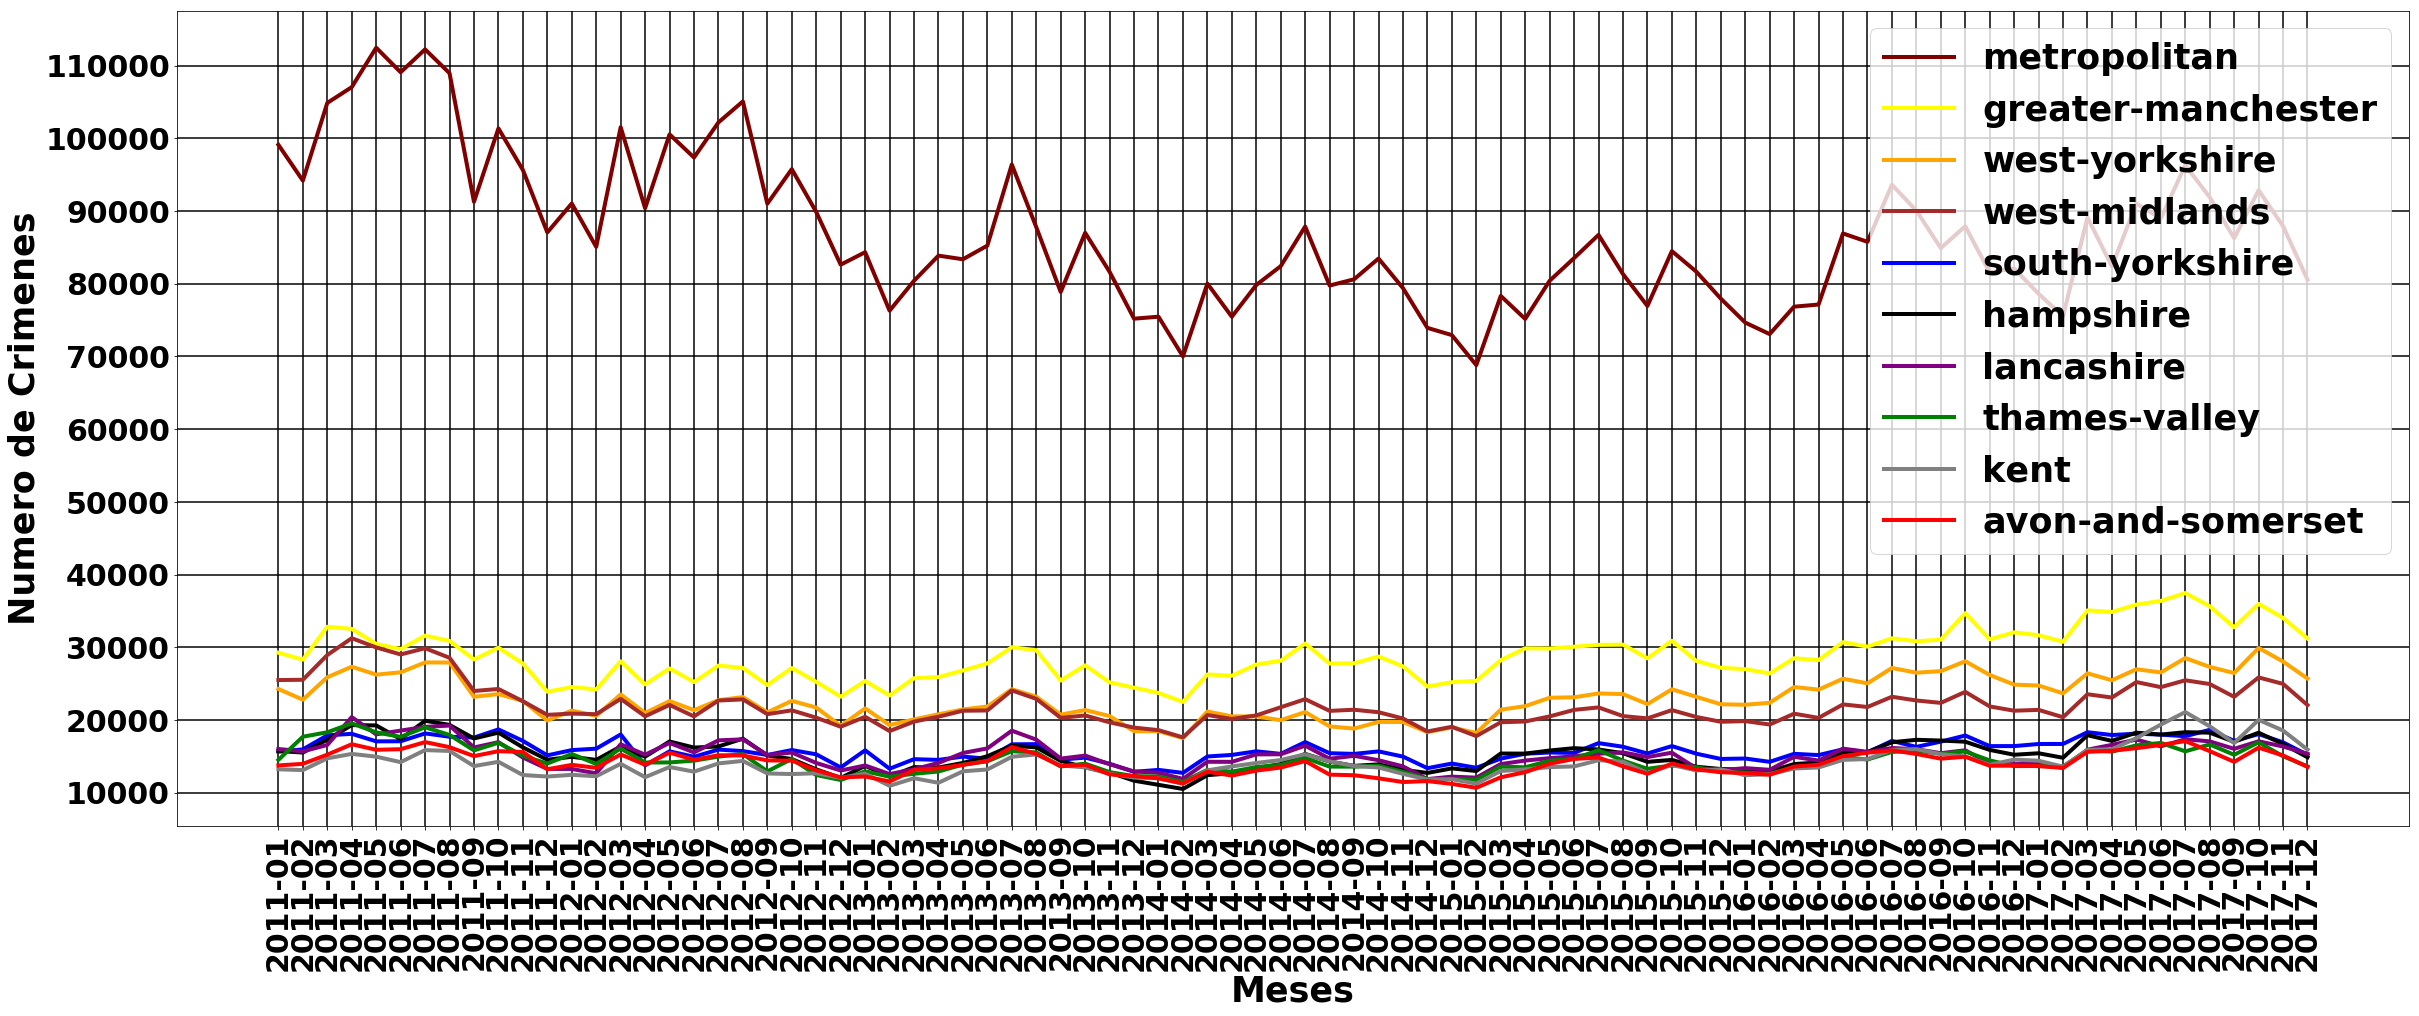

In [111]:
fig = plot.figure(figsize=(40,15))
ax = fig.add_subplot(111)

x_labels = []
for i in ["2011-","2012-","2013-","2014-","2015-","2016-","2017-"]:
    for j in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        x_labels.append(i+j)

plot.xlabel("Meses",fontsize=35,fontweight="bold")
plot.ylabel("Numero de Crimenes",fontsize=35,fontweight="bold")
plot.grid(True,color="black",linewidth=1.5)

numLines = range(len(x_labels))

plot.xticks(numLines,x_labels,fontsize=30,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=90)
plot.yticks([0,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,10e4,11e4],fontsize=30,fontweight="bold")

plot.plot(numLines, topForcesCrimes[0], '-',color="maroon",linewidth=4)
plot.plot(numLines, topForcesCrimes[1], '-',color="yellow",linewidth=4)
plot.plot(numLines, topForcesCrimes[2], '-',color="orange",linewidth=4)
plot.plot(numLines, topForcesCrimes[3], '-',color="brown",linewidth=4)
plot.plot(numLines, topForcesCrimes[4], '-',color="blue",linewidth=4)
plot.plot(numLines, topForcesCrimes[5], '-',color="black",linewidth=4)
plot.plot(numLines, topForcesCrimes[6], '-',color="purple",linewidth=4)
plot.plot(numLines, topForcesCrimes[7], '-',color="green",linewidth=4)
plot.plot(numLines, topForcesCrimes[8], '-',color="gray",linewidth=4)
plot.plot(numLines, topForcesCrimes[9], '-',color="red",linewidth=4)

plot.legend(topForces,prop = {"size":35,"weight":"bold"}, loc = 1)

plot.show()

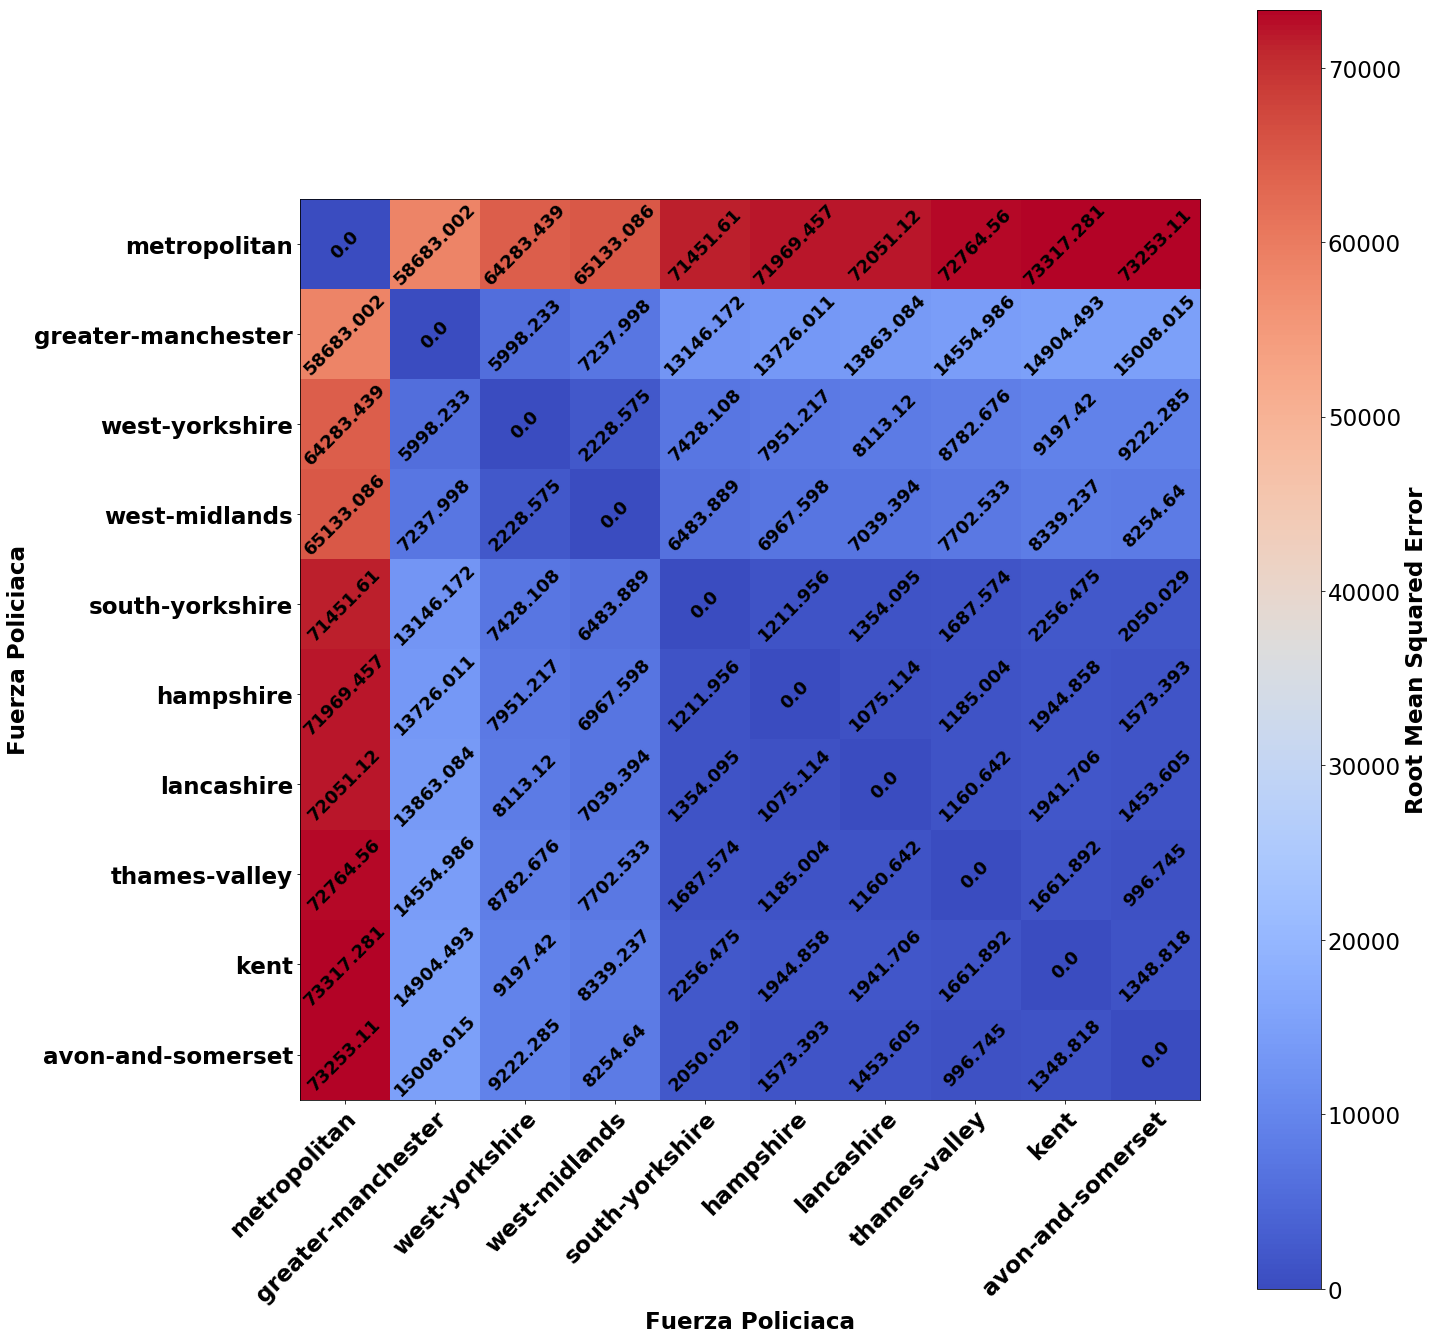

In [129]:
Q11 = [0] * len(topForces)
for i in range(len(topForces)):
    Q11[i] = [0] * len(topForces)

for i in range(len(matrix)):
    for j in range(len(matrix)):
        rmse = sqrt(mean_squared_error(topForcesCrimes[i], topForcesCrimes[j]))
        Q11[i][j] = rmse

fig = plot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

heatmap = ax.imshow(Q11)
plot.set_cmap("coolwarm")

ax.set_xticks(range(len(topForces)))
ax.set_yticks(range(len(topForces)))

ax.set_xticklabels(topForces,fontsize=23,fontweight="bold")
ax.set_yticklabels(topForces,fontsize=23,fontweight="bold")

plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

plot.xlabel("Fuerza Policiaca",fontsize=23,fontweight="bold")
plot.ylabel("Fuerza Policiaca",fontsize=23,fontweight="bold")

for i in range(len(topForces)):
    for j in range(len(topForces)):
        text = ax.text(j, i, round((Q11[i][j]),3),ha="center", rotation=45, va="center", color="black",fontsize=18,fontweight="bold")

cb = plot.colorbar(heatmap) 
cb.set_label("Root Mean Squared Error",weight='bold',size=23)
cb.ax.tick_params(labelsize=23)
fig.tight_layout()

plot.show()

# Grafica Pregunta 12

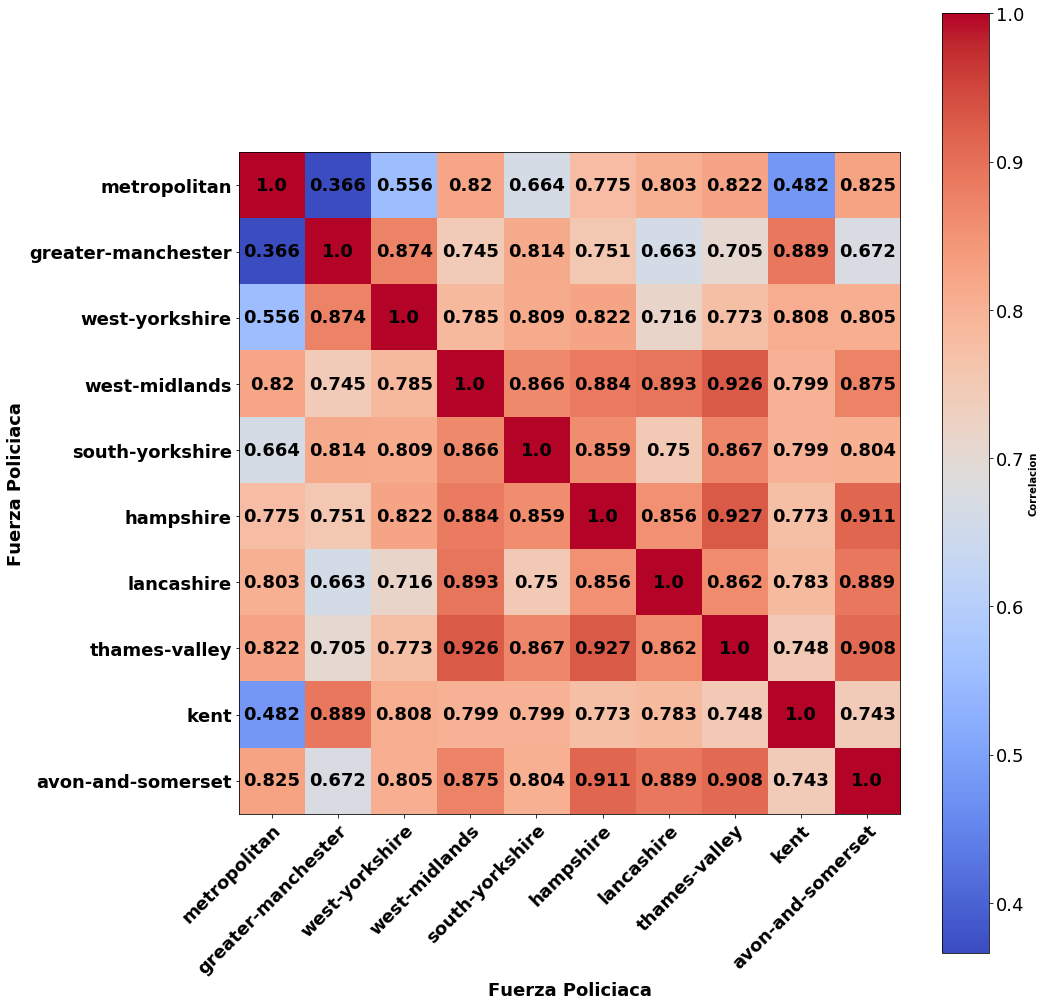

In [108]:
matrix = [0] * len(topForces)
for i in range(len(topForces)):
    matrix[i] = [0] * len(topForces)

for i in range(len(matrix)):
    for j in range(len(matrix)):
        cor, pv = spearmanr(topForcesCrimes[i], topForcesCrimes[j])
        matrix[i][j] = cor

fig = plot.figure(figsize=(15,15))
ax = fig.add_subplot(111)

heatmap = ax.imshow(matrix)
plot.set_cmap("coolwarm")

ax.set_xticks(range(len(topForces)))
ax.set_yticks(range(len(topForces)))

ax.set_xticklabels(topForces,fontsize=18,fontweight="bold")
ax.set_yticklabels(topForces,fontsize=18,fontweight="bold")

plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

plot.xlabel("Fuerza Policiaca",fontsize=18,fontweight="bold")
plot.ylabel("Fuerza Policiaca",fontsize=18,fontweight="bold")

for i in range(len(topForces)):
    for j in range(len(topForces)):
        text = ax.text(j, i, round((matrix[i][j]),3),ha="center", va="center", color="black",fontsize=18,fontweight="bold")

cb = plot.colorbar(heatmap)
cb.set_label("Correlacion",weight='bold')
cb.ax.tick_params(labelsize=18)

fig.tight_layout()

plot.show()